In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
trend=pd.read_csv('shopping_trends.csv')
trend=trend.set_index('Customer ID')
#trend

#Feature Engineering

In [ ]:
a=trend['Age'].unique()
a.sort()
a
trend['Age_group']=pd.cut(trend['Age'],bins=[0,30,60,100],labels=['teenager','adult','senior'])
#trend

In [ ]:
new_order=trend.columns[[0,18,1,2,3,6,7,4,10,13,14,12,16,11,5,8,9,15,17]]
trend=trend[new_order]
trend

,Age,Age_group,Gender,Item Purchased,Category,Size,Color,Purchase Amount (USD),Subscription Status,Discount Applied,Promo Code Used,Shipping Type,Preferred Payment Method,Payment Method,Location,Season,Review Rating,Previous Purchases,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,,
1,55,adult,Male,Blouse,Clothing,L,Gray,53,Yes,Yes,Yes,Express,Venmo,Credit Card,Kentucky,Winter,3.1,14,Fortnightly
2,19,teenager,Male,Sweater,Clothing,L,Maroon,64,Yes,Yes,Yes,Express,Cash,Bank Transfer,Maine,Winter,3.1,2,Fortnightly
3,50,adult,Male,Jeans,Clothing,S,Maroon,73,Yes,Yes,Yes,Free Shipping,Credit Card,Cash,Massachusetts,Spring,3.1,23,Weekly
4,21,teenager,Male,Sandals,Footwear,M,Maroon,90,Yes,Yes,Yes,Next Day Air,PayPal,PayPal,Rhode Island,Spring,3.5,49,Weekly
5,45,adult,Male,Blouse,Clothing,M,Turquoise,49,Yes,Yes,Yes,Free Shipping,PayPal,Cash,Oregon,Spring,2.7,31,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,adult,Female,Hoodie,Clothing,L,Turquoise,28,No,No,No,2-Day Shipping,Venmo,Cash,Virginia,Summer,4.2,32,Weekly
3897,52,adult,Female,Backpack,Accessories,L,White,49,No,No,No,Store Pickup,Bank Transfer,PayPal,Iowa,Spring,4.5,41,Bi-Weekly
3898,46,adult,Female,Belt,Accessories,L,Green,33,No,No,No,Standard,Venmo,Credit Card,New Jersey,Spring,2.9,24,Quarterly


#Ratio of males to females, age groups

Text(0.5, 1.0, 'Distribution of different age groups')

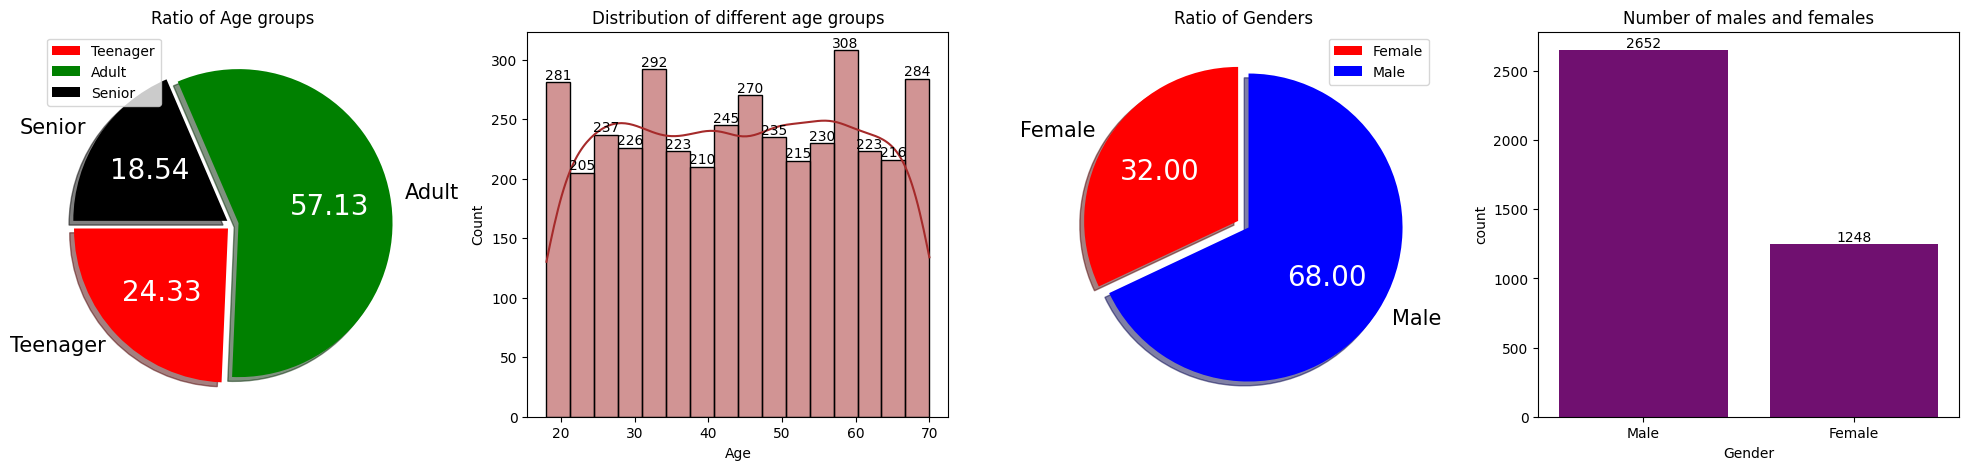

In [ ]:
plt.figure(figsize=(25,5))

plt.subplot(1,4,3)
d=[(trend['Gender']=='Female').sum(),(trend['Gender']=='Male').sum()]
widget,text,sliceText=plt.pie(d,explode=[0.04,0.04],labels=['Female','Male'],shadow=True,colors=['red','blue'],startangle=90,autopct='%.2f')
for s in sliceText:
   s.set_color('white')
   s.set_fontsize(20)
for s1 in text:
   s1.set_color('black')
   s1.set_fontsize(15)
plt.legend()
plt.title('Ratio of Genders')

plt.subplot(1,4,4)
obj=sns.countplot(data=trend,x='Gender',color='purple')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Number of males and females')
#plt.grid()

plt.subplot(1,4,1)
d=[(trend['Age_group']=='teenager').sum(),(trend['Age_group']=='adult').sum(),(trend['Age_group']=='senior').sum()]
widget,text,sliceText=plt.pie(d,explode=[0.04,0.04,0.04],labels=['Teenager','Adult','Senior'],shadow=True,colors=['red','green','black'],startangle=180,autopct='%.2f')
for s in sliceText:
   s.set_color('white')
   s.set_fontsize(20)
for s1 in text:
   s1.set_color('black')
   s1.set_fontsize(15)
plt.legend()
plt.title('Ratio of Age groups')

plt.subplot(1,4,2)
obj=sns.histplot(data=trend,x='Age',color='brown',kde=True)
#plt.xticks=(np.arange(10,80,10))
for i in obj.containers:
  obj.bar_label(i)
plt.title('Distribution of different age groups')
# plt.grid()


observation:

* Adults do more shopping when compared to other age groups and in that males are more in number
* People in age group of 55-65 are seen to do more shopping

#Amount spend by customers

In [ ]:
data=pd.pivot_table(data=trend,index='Age_group',columns='Gender',values='Purchase Amount (USD)',aggfunc='mean').reset_index()
data

<ipython-input-6-45c49eb5eafd>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data=pd.pivot_table(data=trend,index='Age_group',columns='Gender',values='Purchase Amount (USD)',aggfunc='mean').reset_index()


Gender,Age_group,Female,Male
0,teenager,62.152542,59.547401
1,adult,58.942069,59.817033
2,senior,61.942982,58.668687


<ipython-input-7-ab32c2d3cc63>:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data=pd.pivot_table(data=trend,index='Age_group',columns='Gender',values='Purchase Amount (USD)',aggfunc='mean').reset_index()


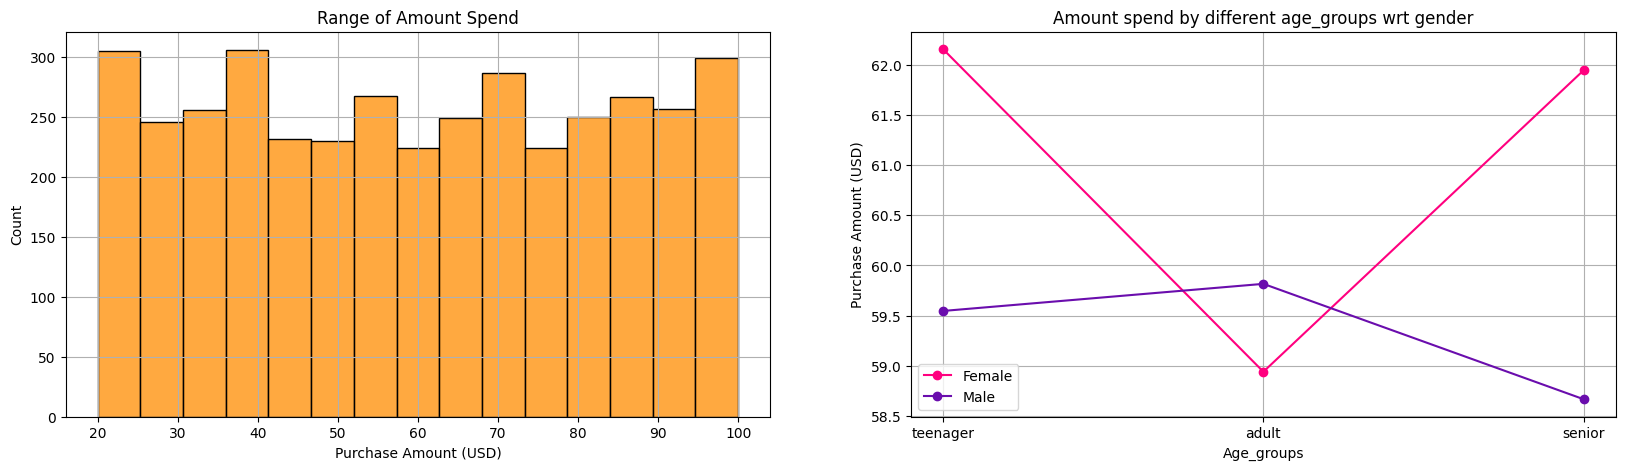

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.histplot(data=trend,x='Purchase Amount (USD)',color='#FF8C00')
plt.title('Range of Amount Spend')
plt.grid()

plt.subplot(1,2,2)
data=pd.pivot_table(data=trend,index='Age_group',columns='Gender',values='Purchase Amount (USD)',aggfunc='mean').reset_index()
y=data['Female']
x=data['Age_group']
plt.plot(x,y,color='#FF007F',marker='o',label='Female')
y=data['Male']
x=data['Age_group']
plt.plot(x,y,color='#6A0DAD',marker='o',label='Male')
plt.grid()
plt.xlabel('Age_groups')
plt.ylabel("Purchase Amount (USD)")
plt.title("Amount spend by different age_groups wrt gender")
plt.legend()


observation:
* Customers in the age group of 20-30 (teenagers) are spending more money in shopping
* Females are spending more money than males
* The products of cost in range of 20-40 USD are purchased more

#Item purchased

In [ ]:
trend['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [ ]:
pd.pivot_table(data=trend,values='Item Purchased',index=['Gender','Age_group'],aggfunc='count')

<ipython-input-9-3a5d52411a50>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data=trend,values='Item Purchased',index=['Gender','Age_group'],aggfunc='count')


Item Purchased
Gender Age_group                
Female teenager              295
       adult                 725
       senior                228
Male   teenager              654
       adult                1503
       senior                495

###wrt Age group

<ipython-input-10-4729ef643d10>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#16E2F5'` for the same effect.

  obj=sns.countplot(data=trend,x='Item Purchased',color='#16E2F5',hue='Age_group')


Text(0.5, 1.0, 'Count of Item purchased by different Age_groups')

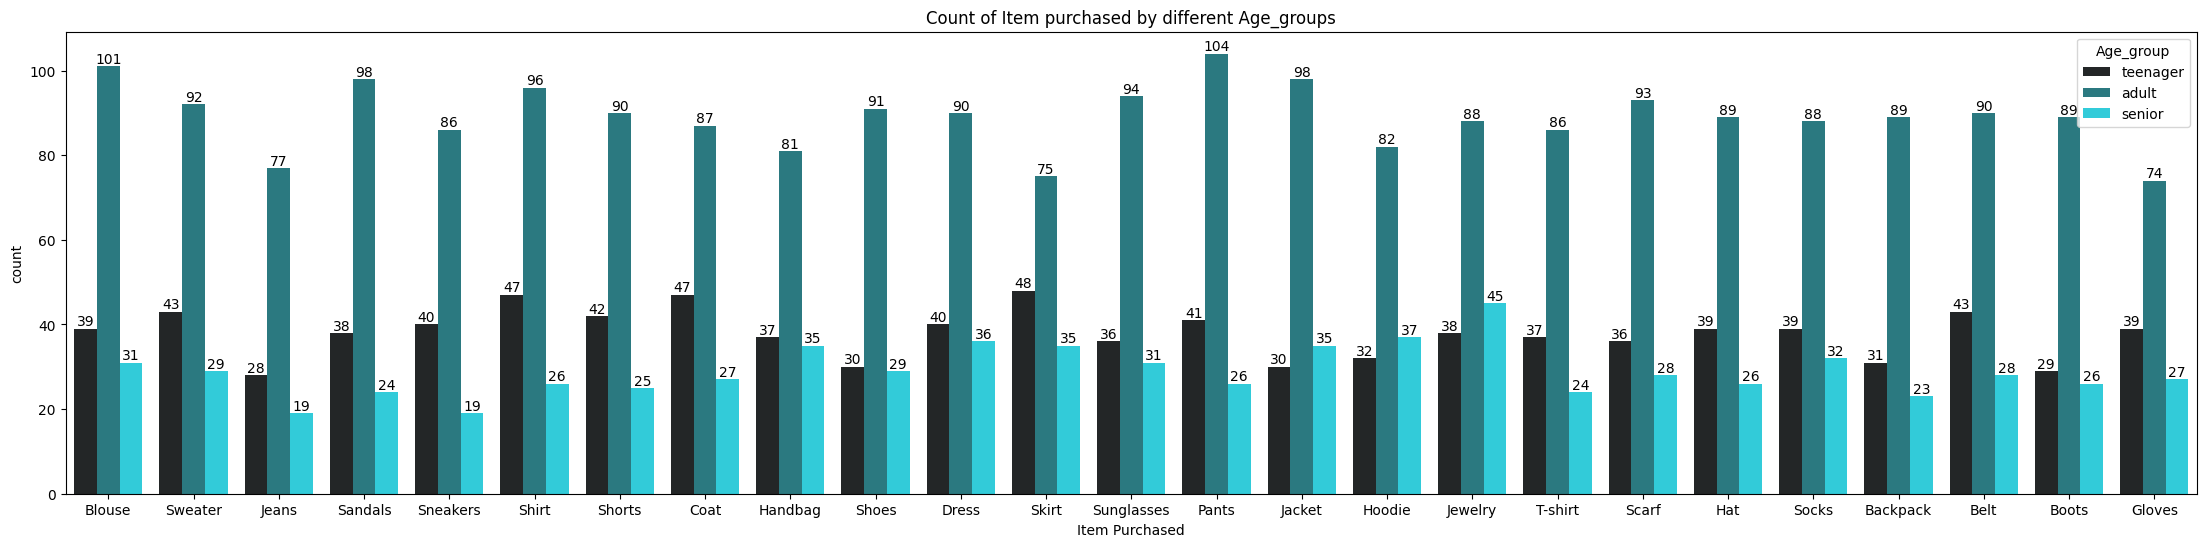

In [ ]:
plt.figure(figsize=(27.5,6))
obj=sns.countplot(data=trend,x='Item Purchased',color='#16E2F5',hue='Age_group')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Count of Item purchased by different Age_groups')

observation:
* The most purchased item by teenagers are skirts and least is jeans
* The most purchased item by adults are pants and least is gloves
* The most purchased item by seniors are jewellery and least is sneakers

##wrt Gender

Text(0.5, 1.0, 'Count of Item purchased by different Gender')

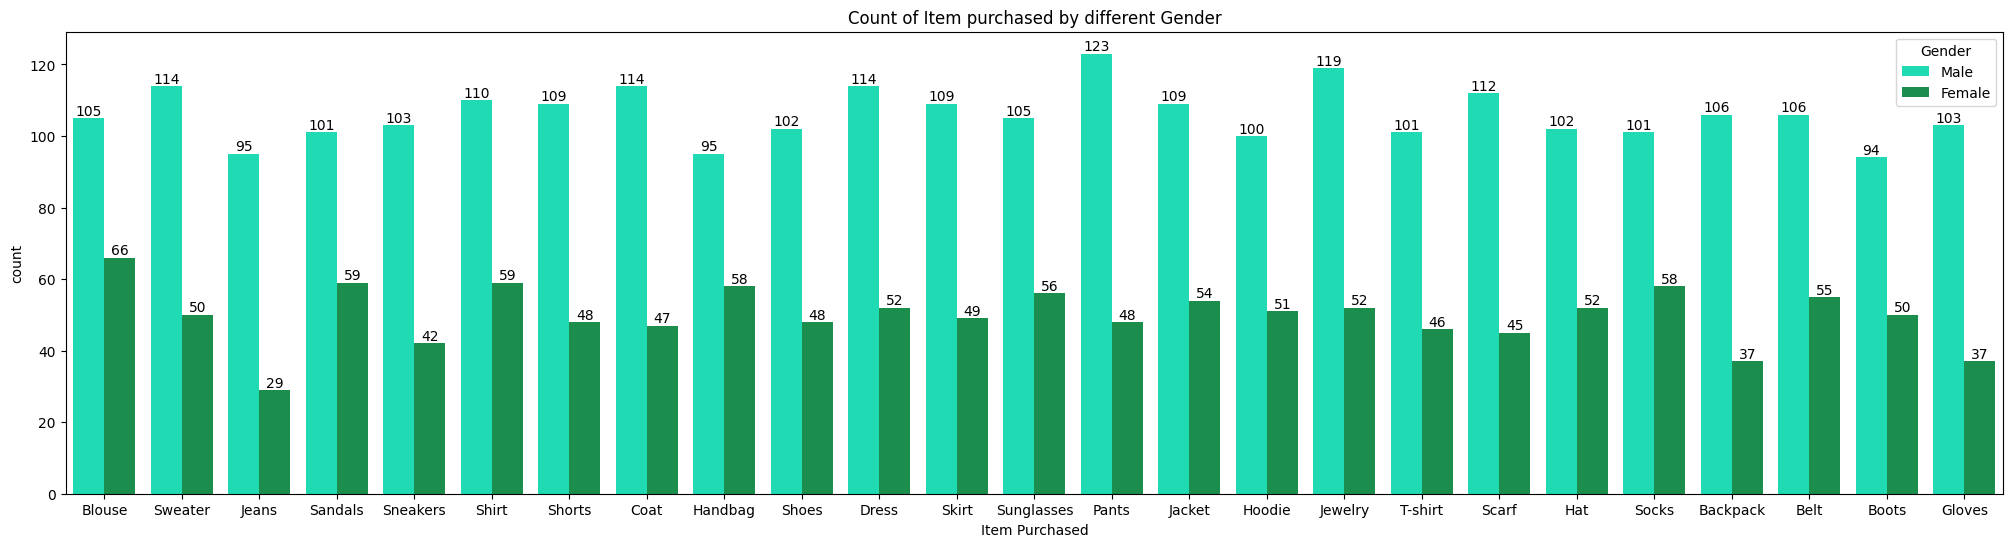

In [ ]:
plt.figure(figsize=(25,6))
obj=sns.countplot(data=trend,x='Item Purchased',palette=['#01F9C6','#08A04B'],hue='Gender')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Count of Item purchased by different Gender')

observation:
* The most purchased item by males are pants and least is boots
* The most purchased item by females are blouse and least is jeans

##wrt Amount spend

<ipython-input-12-2d8e4c352caa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  obj=sns.barplot(data=trend,x='Item Purchased',y='Purchase Amount (USD)',palette='coolwarm')


Text(0.5, 1.0, 'Average of amount spend for each item')

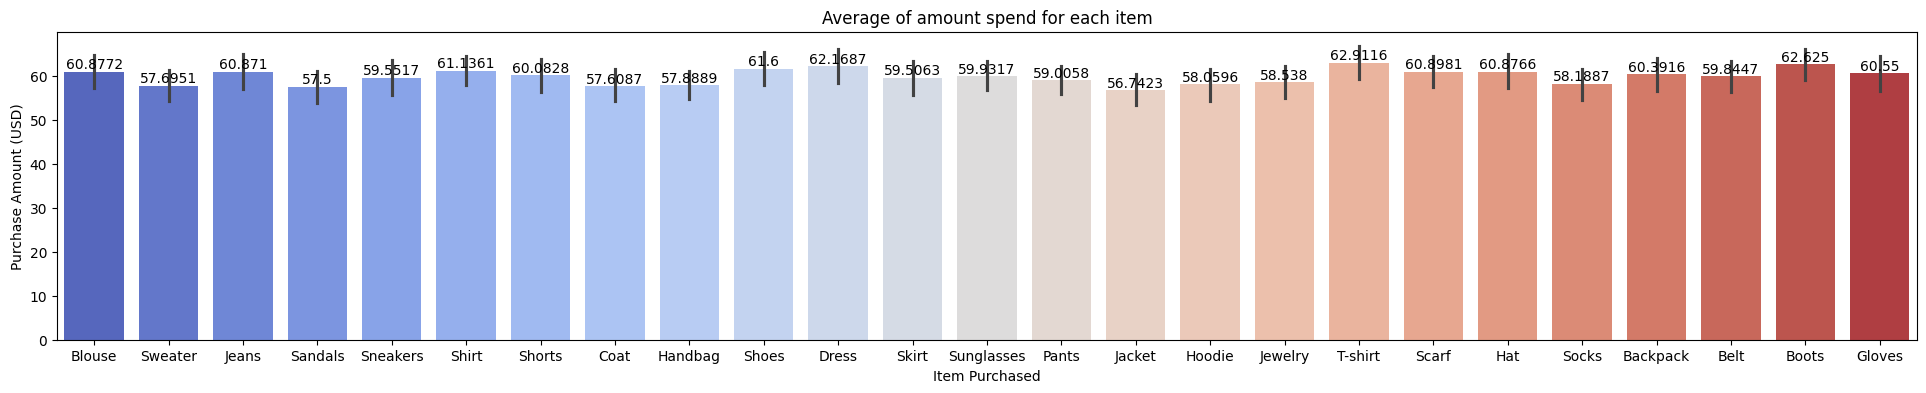

In [ ]:
plt.figure(figsize=(24,4))
obj=sns.barplot(data=trend,x='Item Purchased',y='Purchase Amount (USD)',palette='coolwarm')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Average of amount spend for each item')

observation:
* More amount was spend on buying T-shirts
* Least amount was spend on sandals

##wrt Sizes

Text(0.5, 1.0, 'Number of purchases of different items wrt sizes')

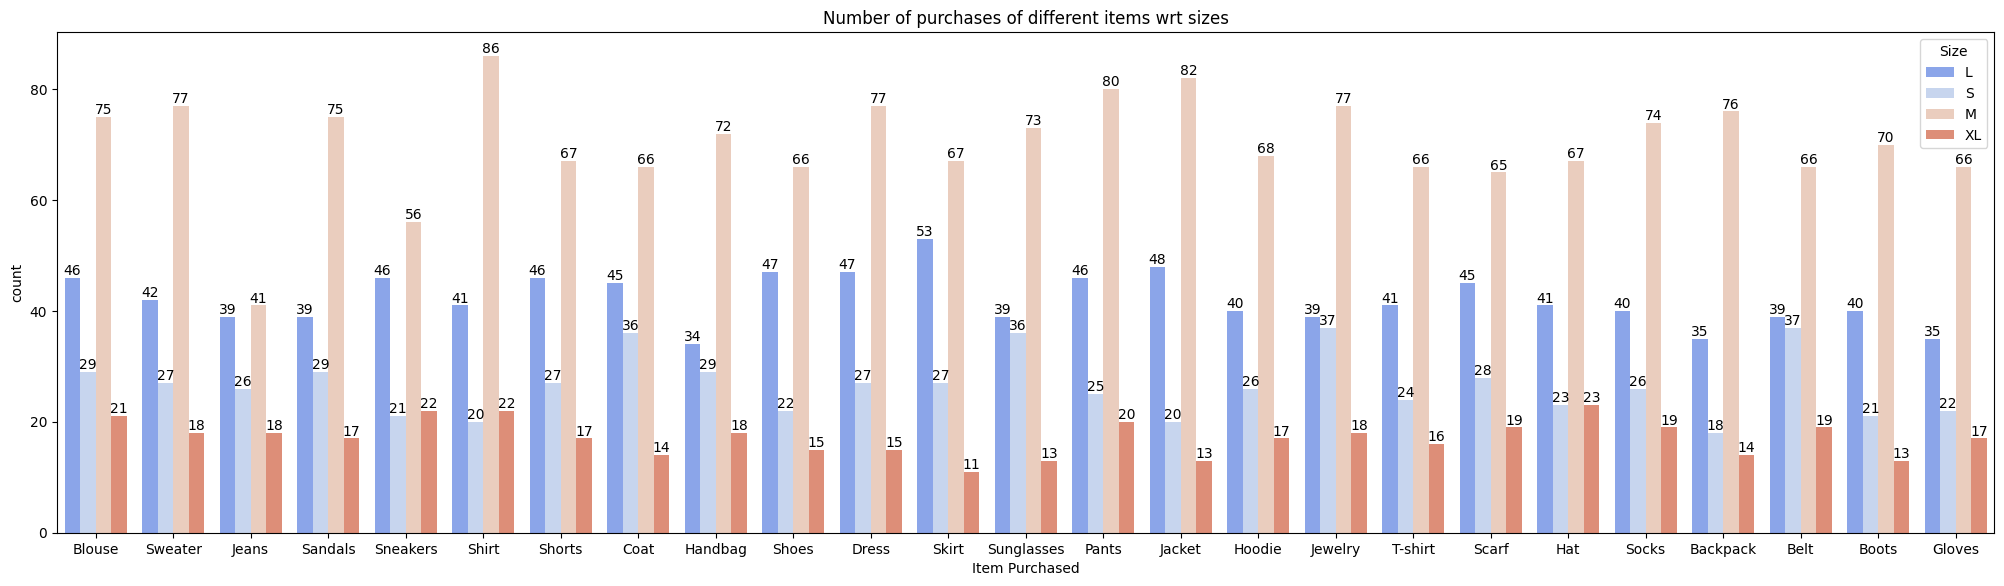

In [ ]:
plt.figure(figsize=(25,6.5))
obj=sns.countplot(data=trend,x='Item Purchased',hue='Size',palette='coolwarm')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Number of purchases of different items wrt sizes')

observation:
* For size L, most and least purchased items are skirt and handbag
* For size S, most and least purchased items are (jewellery,belt) and backpack
* For size M, most and least purchased items are shirt and jeans
* For size XL, most and least purchased items are hat and skirt

#Category

In [ ]:
trend['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [ ]:
pd.pivot_table(data=trend,values='Item Purchased',columns=['Gender','Age_group'],index='Category',aggfunc='count')

<ipython-input-15-84a6f33815f4>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data=trend,values='Item Purchased',columns=['Gender','Age_group'],index='Category',aggfunc='count')


Gender        Female                  Male             
Age_group   teenager adult senior teenager adult senior
Category                                               
Accessories       91   219     82      208   479    161
Clothing         133   329     94      303   652    226
Footwear          46   120     33       91   244     65
Outerwear         25    57     19       52   128     43

###Gender, age groups and purchases

<ipython-input-16-a936173d2f8e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=trend,x='Category',palette='coolwarm',y='Purchase Amount (USD)')
<ipython-input-16-a936173d2f8e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  obj=sns.boxplot(data=trend,palette='rocket',y='Previous Purchases',x='Category')


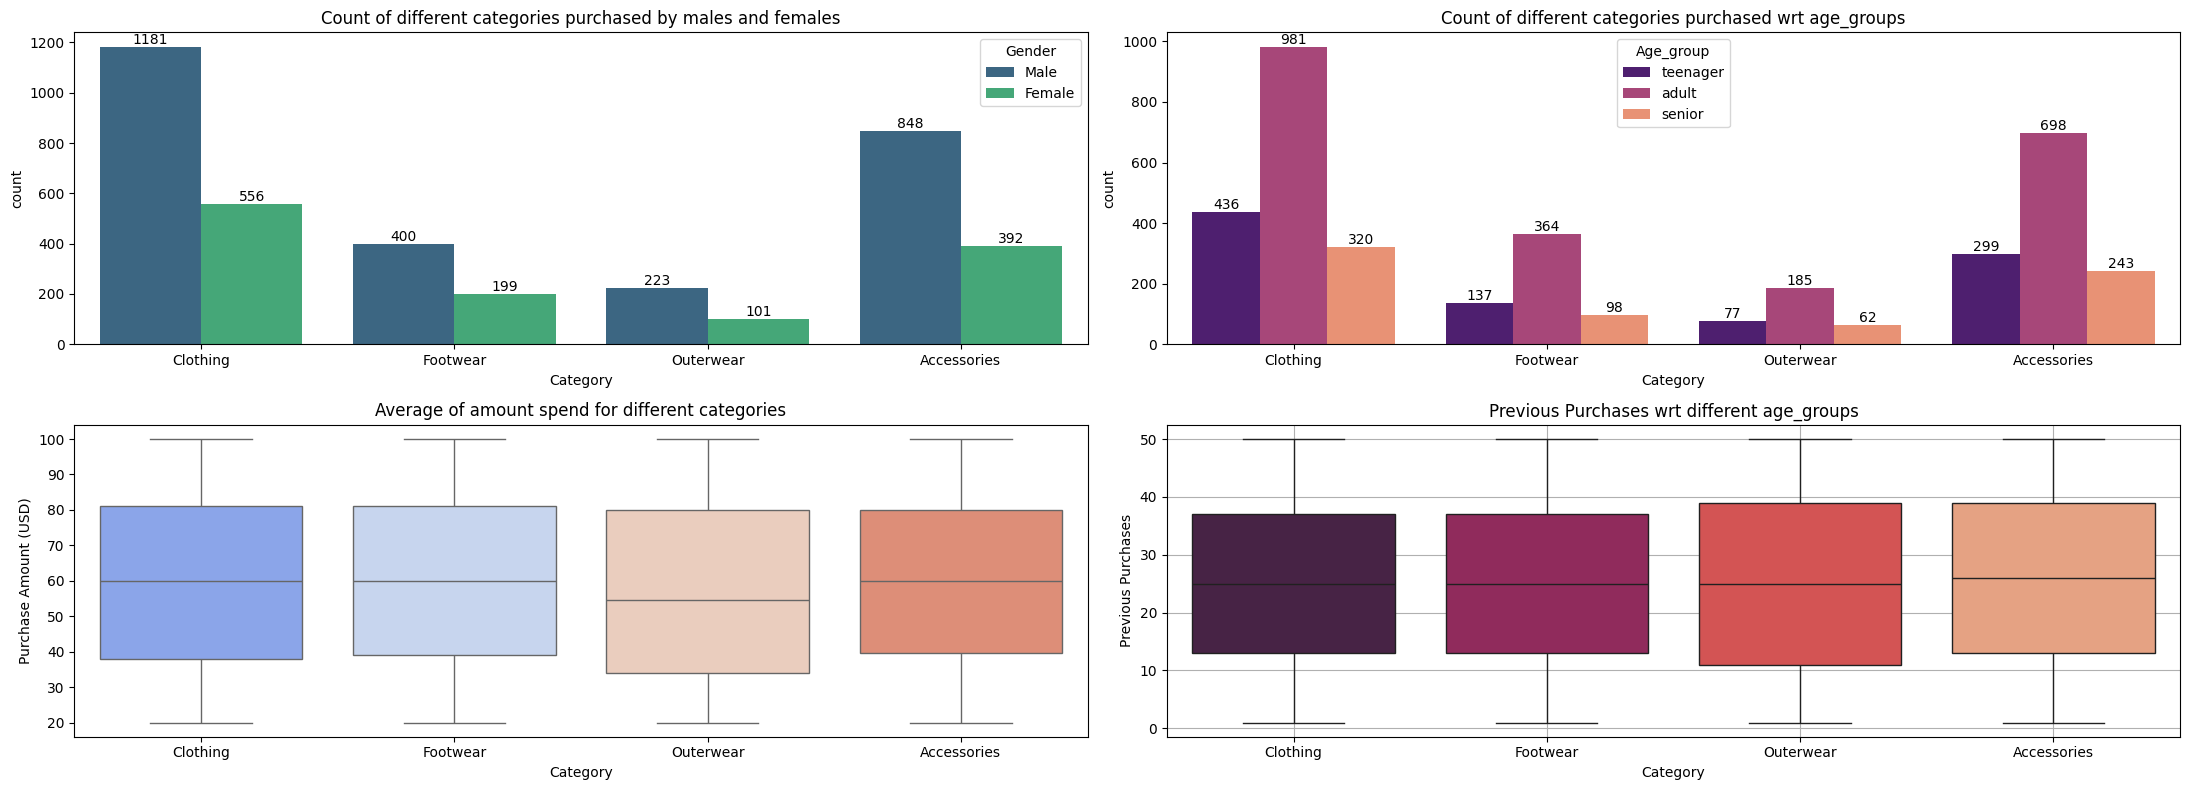

In [ ]:
plt.figure(figsize=(22,8))

plt.subplot(2,2,1)
obj=sns.countplot(data=trend,x='Category',palette='viridis',hue='Gender')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Count of different categories purchased by males and females')

plt.subplot(2,2,2)
obj=sns.countplot(data=trend,x='Category',palette='magma',hue='Age_group')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Count of different categories purchased wrt age_groups')

plt.subplot(2,2,3)
sns.boxplot(data=trend,x='Category',palette='coolwarm',y='Purchase Amount (USD)')
plt.title('Average of amount spend for different categories')

plt.subplot(2,2,4)
obj=sns.boxplot(data=trend,palette='rocket',y='Previous Purchases',x='Category')
plt.grid()
plt.title('Previous Purchases wrt different age_groups')

plt.tight_layout()

observation:
* The most purchased category is clothing
* Least purchased is outerwear
* More money was spend on clothing and footwear and least on outerwer
* Previous purchases were more for footwera and least for accessories

###Review Ratings

Text(0.5, 1.0, 'Average of ratings for categories purchased wrt gender')

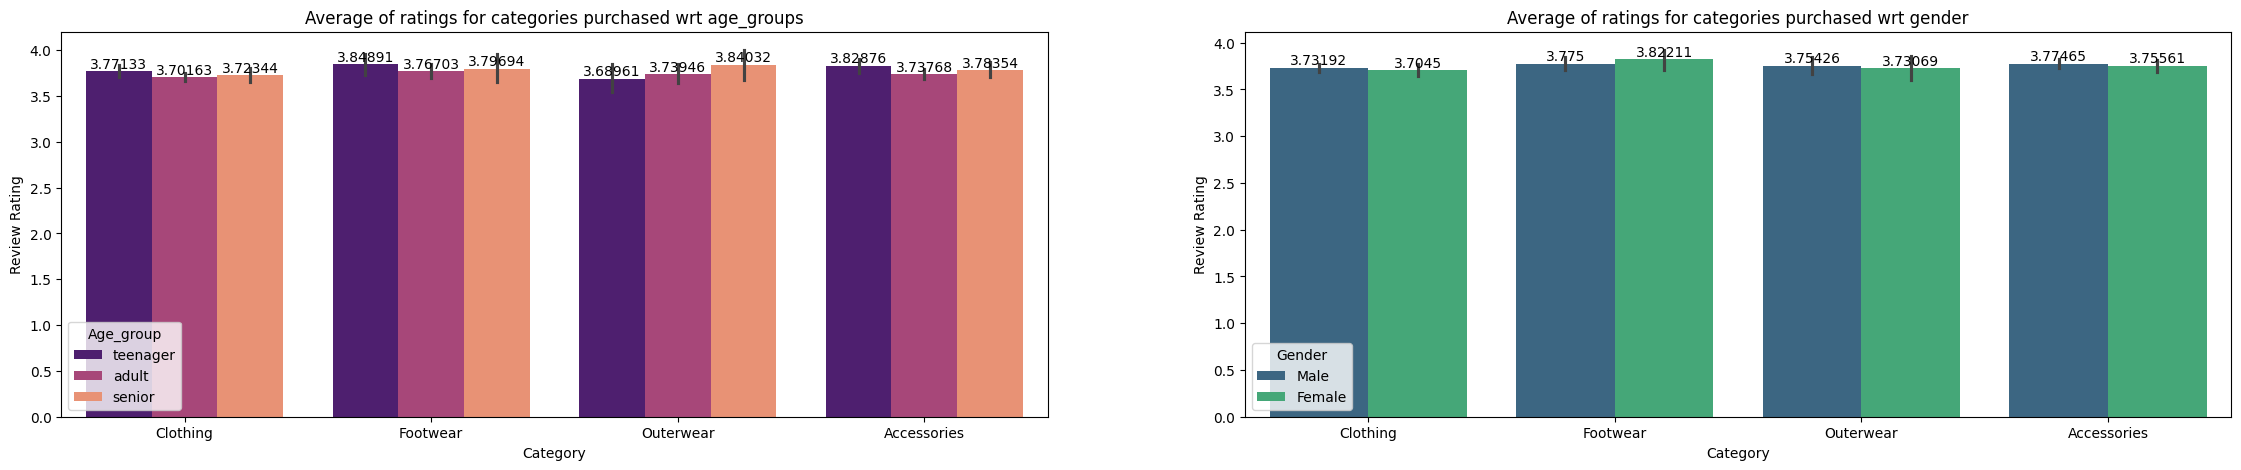

In [ ]:
plt.figure(figsize=(28,5))

plt.subplot(1,2,1)
obj=sns.barplot(data=trend,x='Category',y='Review Rating',palette='magma',hue='Age_group')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Average of ratings for categories purchased wrt age_groups')

plt.subplot(1,2,2)
obj=sns.barplot(data=trend,x='Category',y='Review Rating',palette='viridis',hue='Gender')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Average of ratings for categories purchased wrt gender')

observation:
* The highest ratings were given by seniors for outerweras and lowest for the same by teenagers
* Ratings with respect to gender was more for footwera given by females and least for clothing given by females

###Location and Seasons

<ipython-input-30-e58ac73d70b5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  obj=sns.countplot(data=trend,x='Location',palette='viridis')


Text(0.5, 1.0, 'Count of different categories purchased in different seasons')

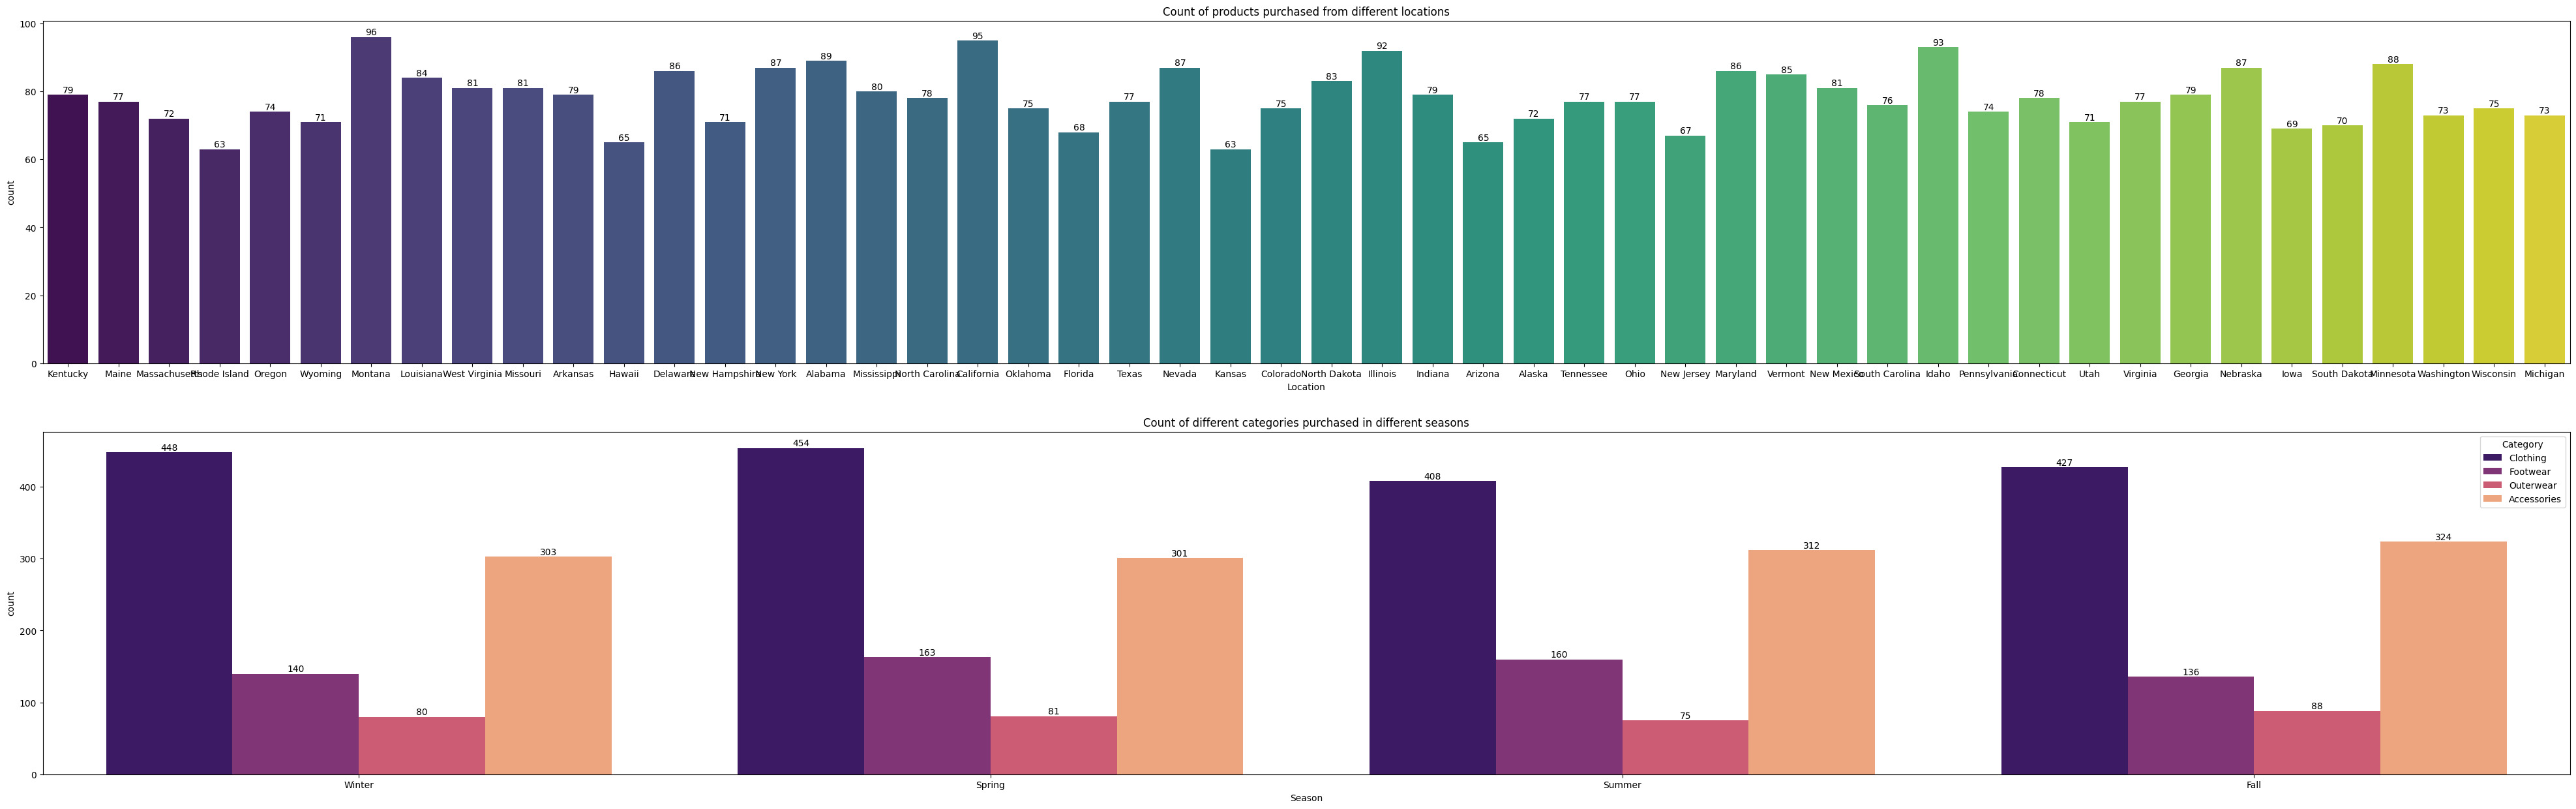

In [ ]:
plt.figure(figsize=(50,15))

plt.subplot(2,1,1)
obj=sns.countplot(data=trend,x='Location',palette='viridis')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Count of products purchased from different locations')

plt.subplot(2,1,2)
obj=sns.countplot(data=trend,x='Season',palette='magma',hue='Category')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Count of different categories purchased in different seasons')

#Sizes

In [ ]:
pd.pivot_table(data=trend,values='Category',index=['Gender','Age_group'],columns='Size',aggfunc='count')

<ipython-input-19-d4a0bb602928>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data=trend,values='Category',index=['Gender','Age_group'],columns='Size',aggfunc='count')


Size                L    M    S   XL
Gender Age_group                    
Female teenager    69  146   44   36
       adult      191  348  111   75
       senior      77   96   32   23
Male   teenager   169  283  114   88
       adult      414  659  272  158
       senior     133  223   90   49

<ipython-input-20-c9d50fb52248>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=trend,x='Size',y='Purchase Amount (USD)',palette='Set1')


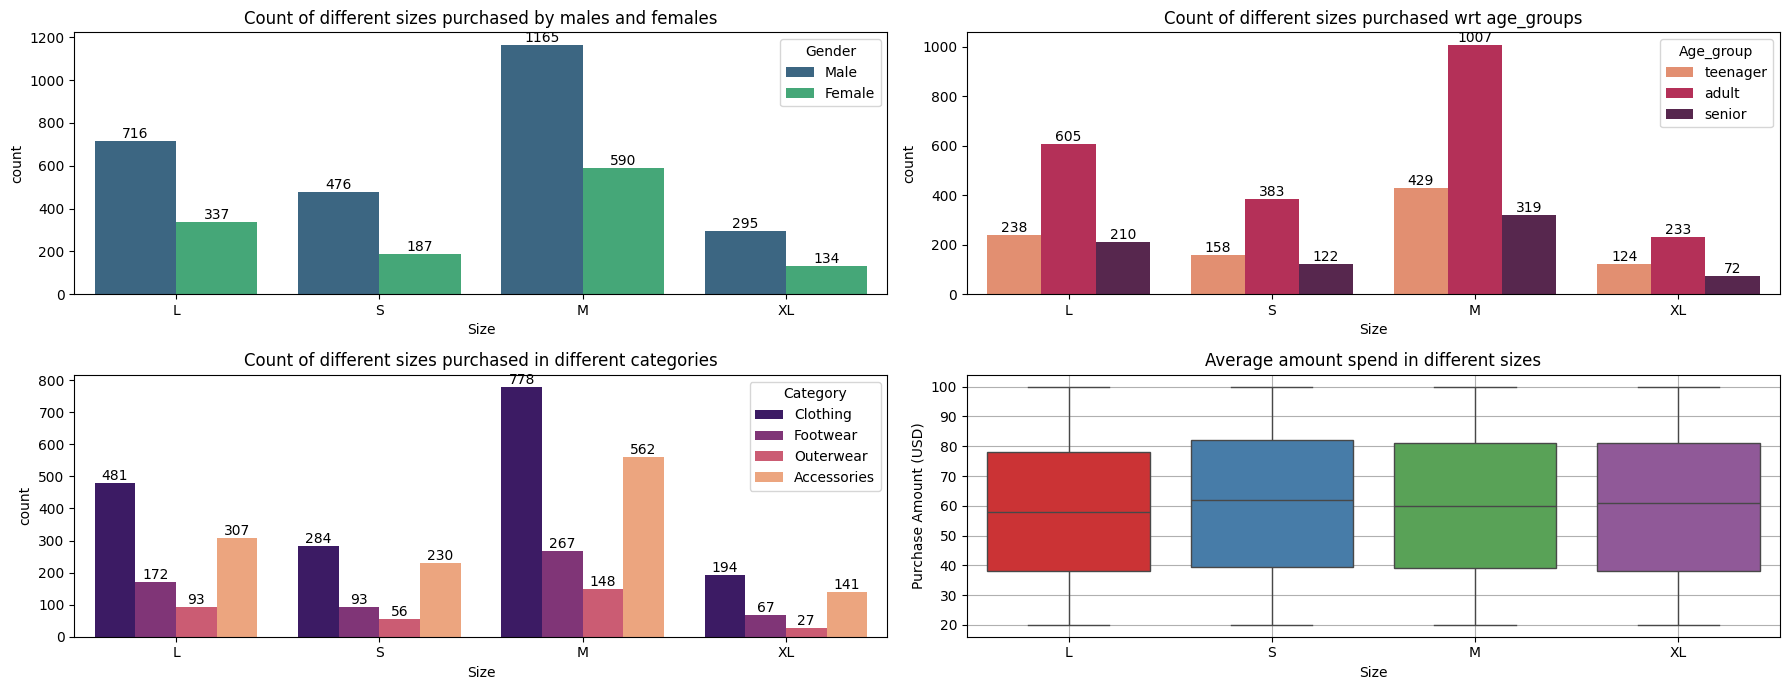

In [ ]:
plt.figure(figsize=(18,7))

plt.subplot(2,2,1)
obj=sns.countplot(data=trend,x='Size',palette='viridis',hue='Gender')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Count of different sizes purchased by males and females')

plt.subplot(2,2,2)
obj=sns.countplot(data=trend,x='Size',palette='rocket_r',hue='Age_group')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Count of different sizes purchased wrt age_groups')

plt.subplot(2,2,3)
obj=sns.countplot(data=trend,x='Size',palette='magma',hue='Category')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Count of different sizes purchased in different categories')

plt.subplot(2,2,4)
sns.boxplot(data=trend,x='Size',y='Purchase Amount (USD)',palette='Set1')
plt.title('Average amount spend in different sizes')
plt.grid()

plt.tight_layout()

observation:
* The most purchased size wrt gender and age groups is M
* The least purchased size wrt gender and age group is XL
* Clothing was most preferred in M and XL and Outerwear is least preferred
* More amount was spend on S size when compared to others and least amount in L

#Color

In [ ]:
pd.pivot_table(data=trend,values='Category',index=['Gender','Age_group'],columns='Color',aggfunc='count')

<ipython-input-21-d18fdbd3c775>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data=trend,values='Category',index=['Gender','Age_group'],columns='Color',aggfunc='count')


Color             Beige  Black  Blue  Brown  Charcoal  Cyan  Gold  Gray  \
Gender Age_group                                                          
Female teenager      10     10    11      7        14    14     9    12   
       adult         20     32    29     32        25    26    27    30   
       senior        10     12    12      7        11     7     5    11   
Male   teenager      20     29    27     26        23    29    25    23   
       adult         66     65    53     51        58    70    51    64   
       senior        21     19    20     18        22    20    21    19   

Color             Green  Indigo  ...  Peach  Pink  Purple  Red  Silver  Teal  \
Gender Age_group                 ...                                           
Female teenager      18      11  ...     13    12       8    8      10    15   
       adult         29      24  ...     27    38      28   29      34    26   
       senior         9      10  ...      8     8       6    7       8    12   
Male   teenager      34      29  ...     35    17      29   28      30    24   
       adult         62      58  ...     54    67      60   64      65    76   
       senior        17      15  ...     12    11      20   12      26    19   

Color             Turquoise  Violet  White  Yellow  
Gender Age_group                                    
Female teenager           9      10      8      18  
       adult             23      30     25      32  
       senior             8      13     12      10  
Male   teenager          22      20     20      27  
       adult             68      72     56      59  
       senior            15      21     21      28  

[6 rows x 25 columns]

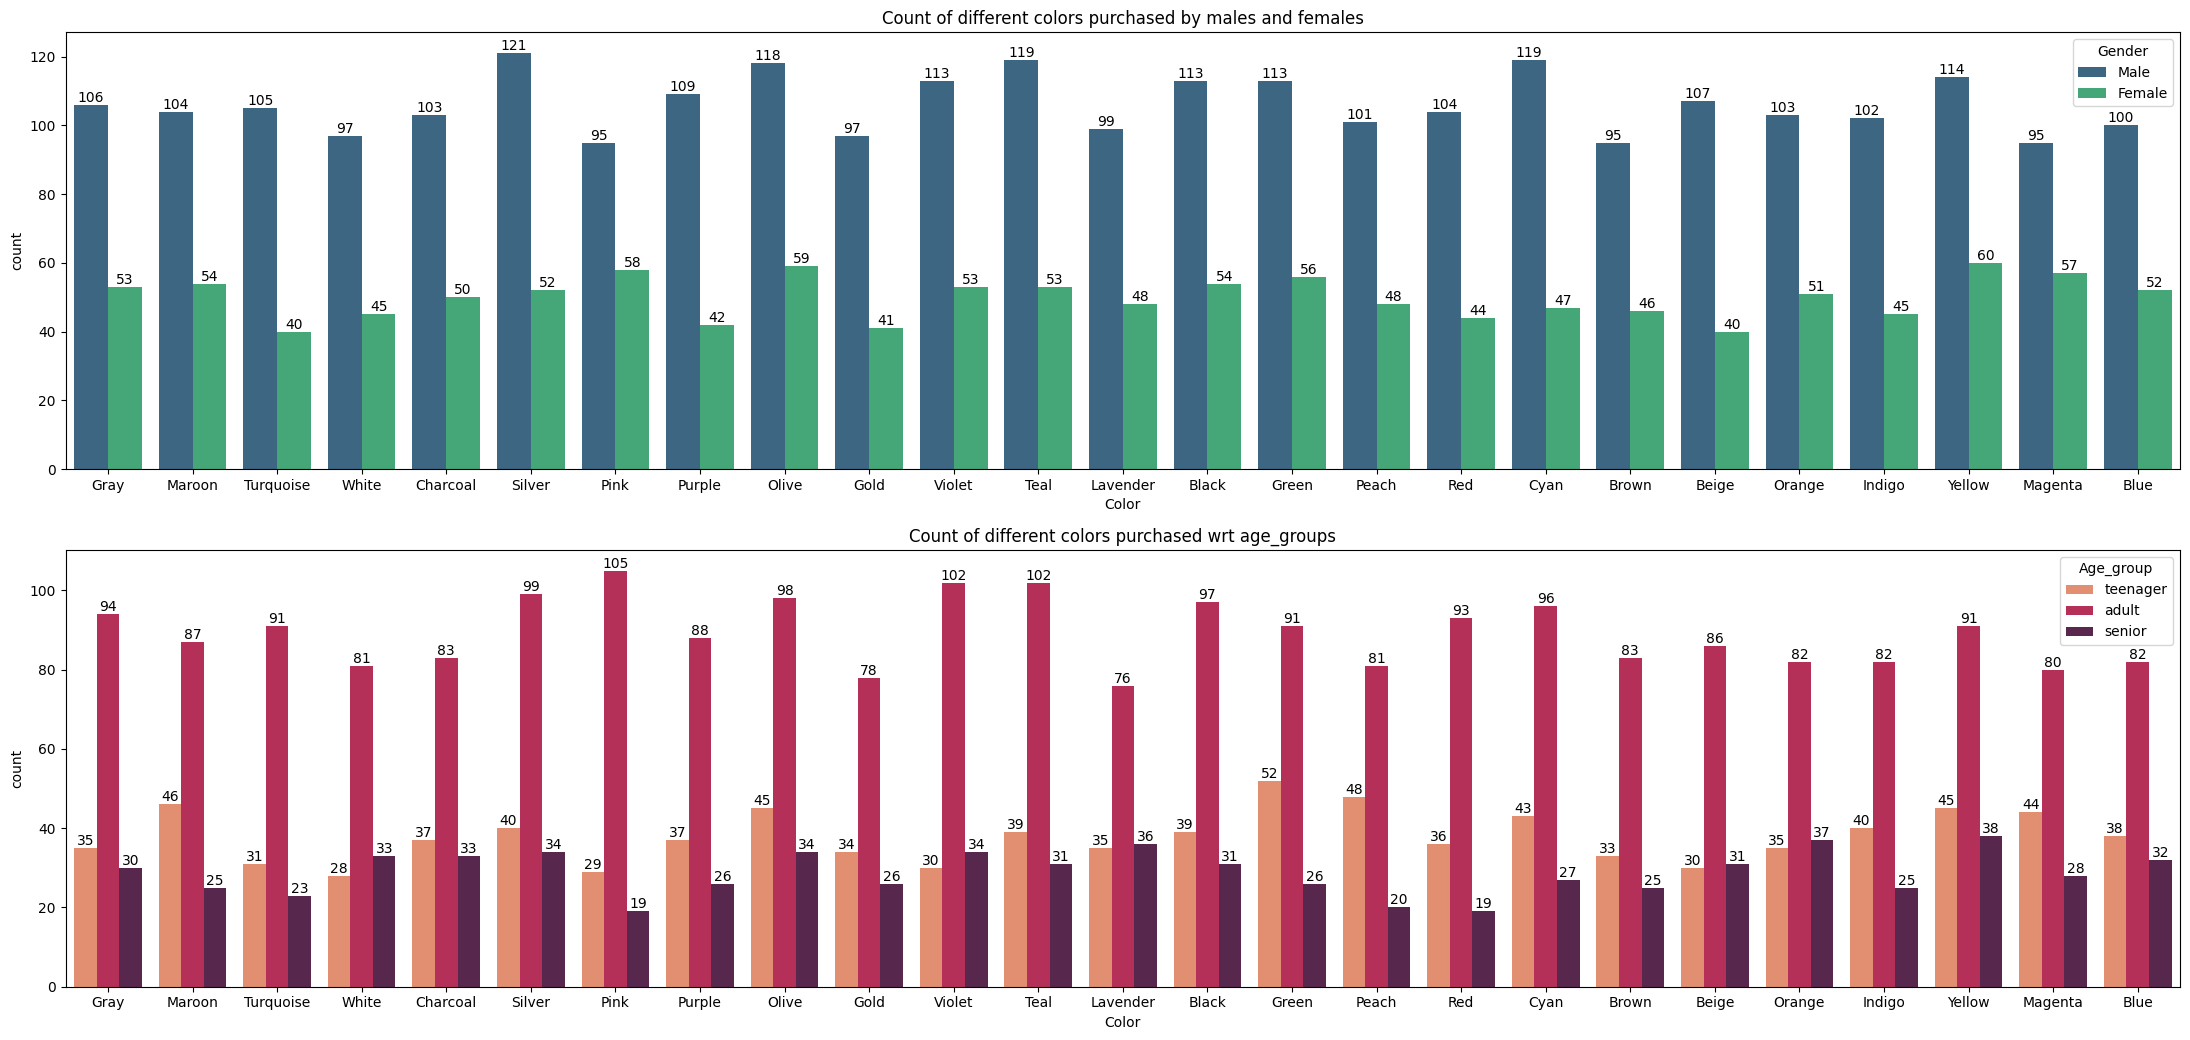

In [ ]:
plt.figure(figsize=(22,10.5))

plt.subplot(2,1,1)
obj=sns.countplot(data=trend,x='Color',palette='viridis',hue='Gender')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Count of different colors purchased by males and females')

plt.subplot(2,1,2)
obj=sns.countplot(data=trend,x='Color',palette='rocket_r',hue='Age_group')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Count of different colors purchased wrt age_groups')
plt.tight_layout()

observation:
* Most preferred color by males is silver and by females is yellow
* Least preferred color by males is (pink and magenta) and by females is (turquoise and beige)
* Preferred color of teenagers is green, adults is pink and seniors is yellow
* Least preferred color of teenagers is white, adults is lavender and seniors is (pink and red)


Text(0.5, 1.0, 'Count of different colors purchased in different categories')

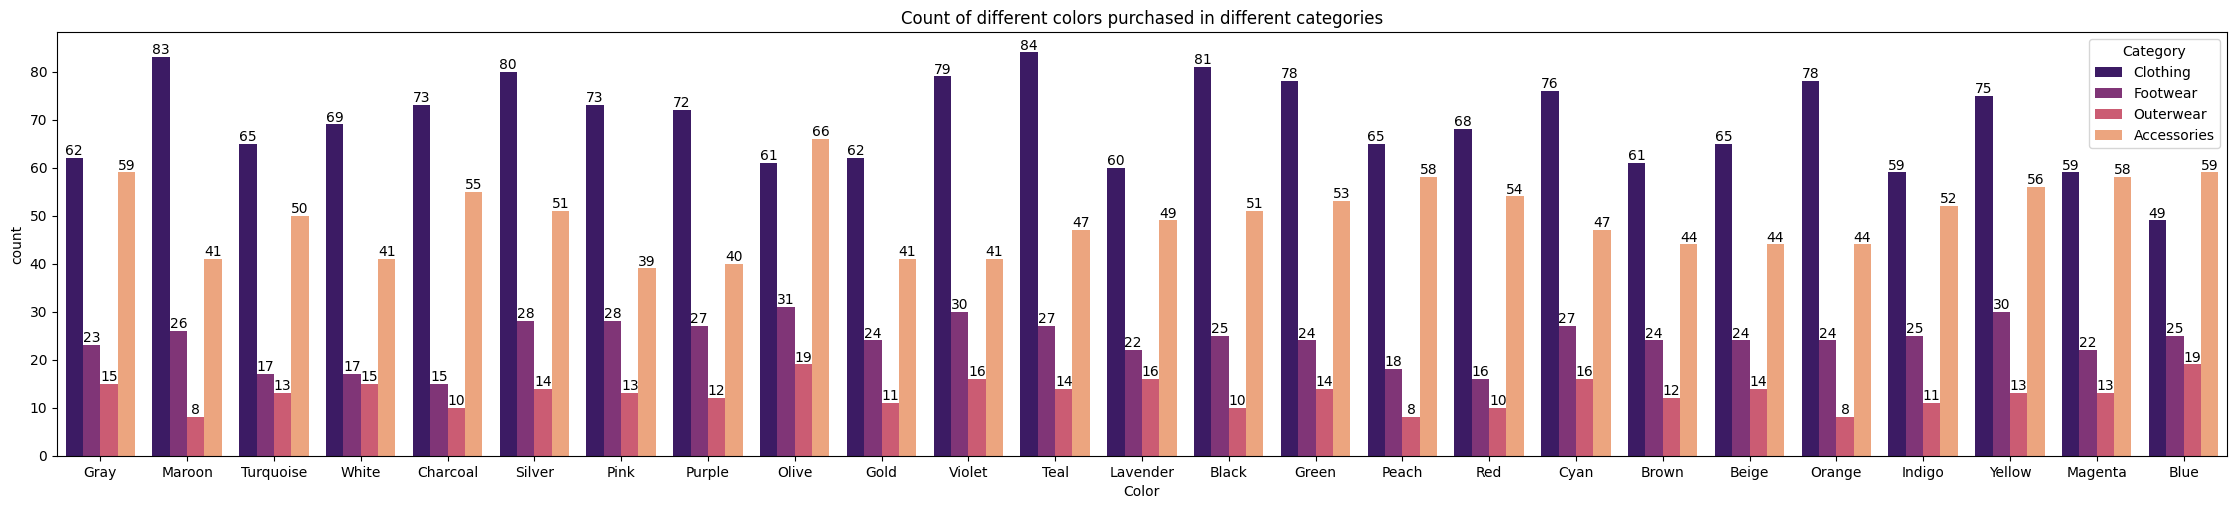

In [ ]:
plt.figure(figsize=(28,5.5))
obj=sns.countplot(data=trend,x='Color',palette='magma',hue='Category')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Count of different colors purchased in different categories')

observation:
* Color preferred for clothing is teal
* Footwear is olive
* Outerwear is (olive and blue)
* Accessories is olive

#Subscription Status, Discount and Promo code

###Subscription Status

Text(0.5, 1.0, 'Average amount depending on Subscription Status')

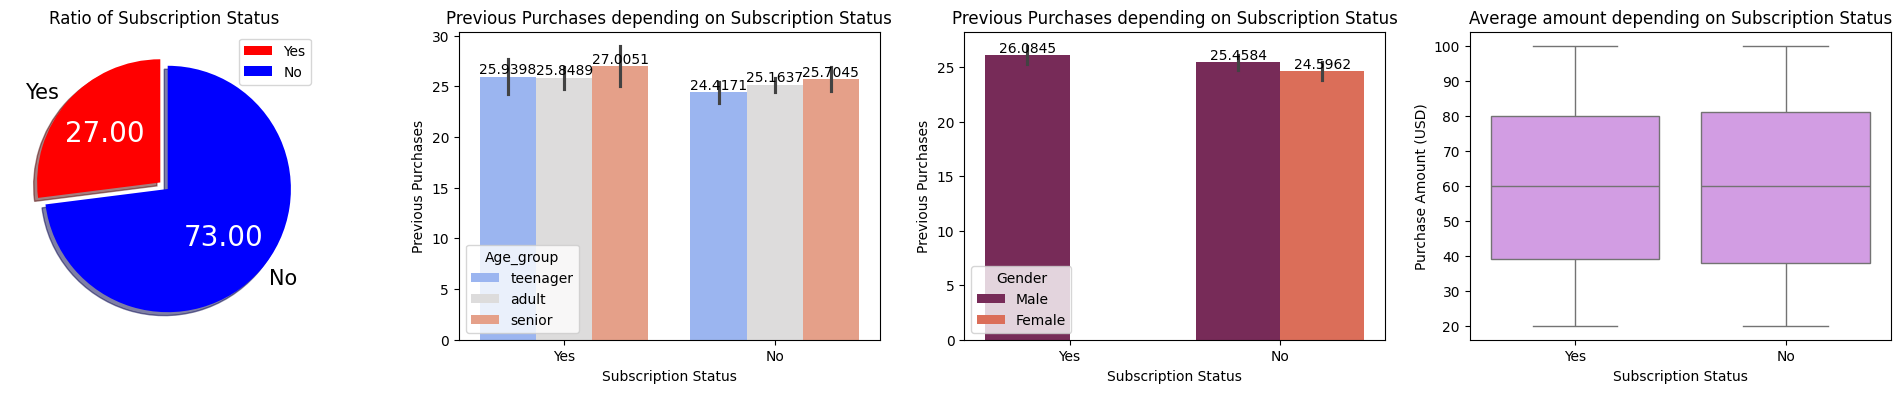

In [ ]:
plt.figure(figsize=(25,4))

plt.subplot(1,4,1)
d=[(trend['Subscription Status']=='Yes').sum(),(trend['Subscription Status']=='No').sum()]
widget,text,sliceText=plt.pie(d,explode=[0.04,0.04],labels=['Yes','No'],shadow=True,colors=['red','blue'],startangle=90,autopct='%.2f')
for s in sliceText:
   s.set_color('white')
   s.set_fontsize(20)
for s1 in text:
   s1.set_color('black')
   s1.set_fontsize(15)
plt.legend()
plt.title('Ratio of Subscription Status')

plt.subplot(1,4,2)
obj=sns.barplot(data=trend,x='Subscription Status',y='Previous Purchases',palette='coolwarm',hue='Age_group')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Previous Purchases depending on Subscription Status')

plt.subplot(1,4,3)
obj=sns.barplot(data=trend,x='Subscription Status',y='Previous Purchases',palette='rocket',hue='Gender')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Previous Purchases depending on Subscription Status')

plt.subplot(1,4,4)
obj=sns.boxplot(data=trend,x='Subscription Status',y='Purchase Amount (USD)',color='#D891EF')
# for i in obj.containers:
#   obj.bar_label(i)
plt.title('Average amount depending on Subscription Status')

observation:
* Most customers are not having any subscriptions
* Having or not having a subscription does not make any big change in sales profit and purchases

###Discount Applied

Text(0.5, 1.0, 'Average amount depending on Discount Applied')

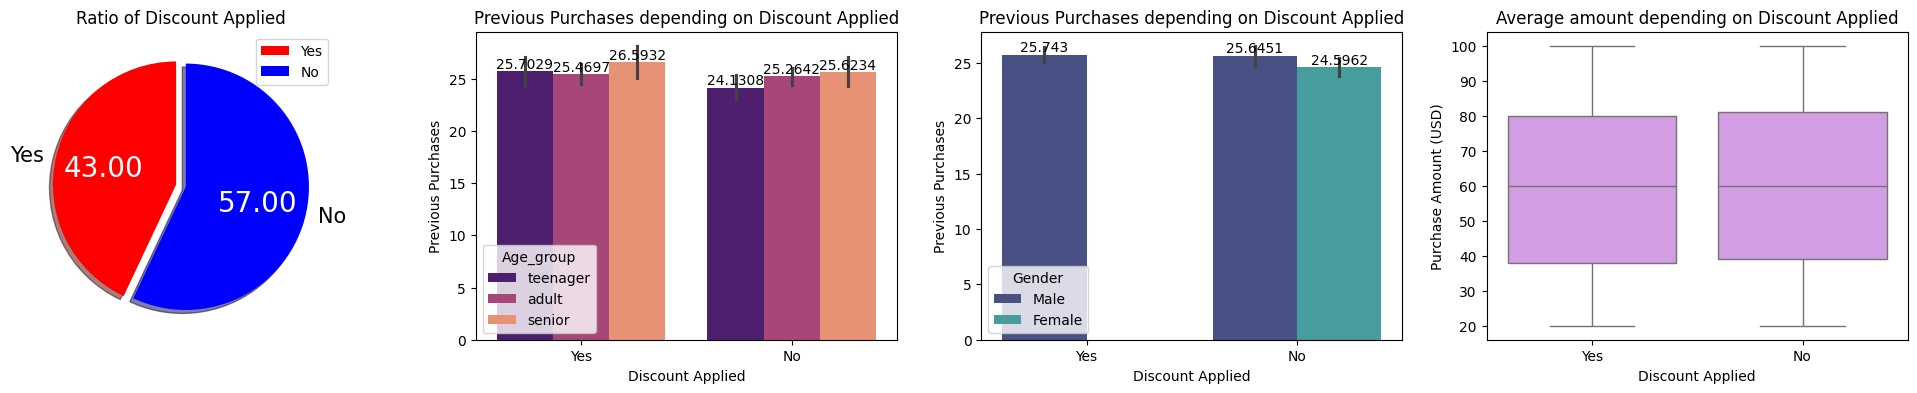

In [ ]:
plt.figure(figsize=(25,4))

plt.subplot(1,4,1)
d=[(trend['Discount Applied']=='Yes').sum(),(trend['Discount Applied']=='No').sum()]
widget,text,sliceText=plt.pie(d,explode=[0.04,0.04],labels=['Yes','No'],shadow=True,colors=['red','blue'],startangle=90,autopct='%.2f')
for s in sliceText:
   s.set_color('white')
   s.set_fontsize(20)
for s1 in text:
   s1.set_color('black')
   s1.set_fontsize(15)
plt.legend()
plt.title('Ratio of Discount Applied')

plt.subplot(1,4,2)
obj=sns.barplot(data=trend,x='Discount Applied',y='Previous Purchases',palette='magma',hue='Age_group')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Previous Purchases depending on Discount Applied')

plt.subplot(1,4,3)
obj=sns.barplot(data=trend,x='Discount Applied',y='Previous Purchases',palette='mako',hue='Gender')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Previous Purchases depending on Discount Applied')

plt.subplot(1,4,4)
obj=sns.boxplot(data=trend,x='Discount Applied',y='Purchase Amount (USD)',color='#D891EF')
# for i in obj.containers:
#   obj.bar_label(i)
plt.title('Average amount depending on Discount Applied')


observation:
* Most customers are not getting any discount
* Having or not having any discount applied does not make any big change in sales profit and purchases

###Promo code used

Text(0.5, 1.0, 'Average amount depending on Promo Code Used')

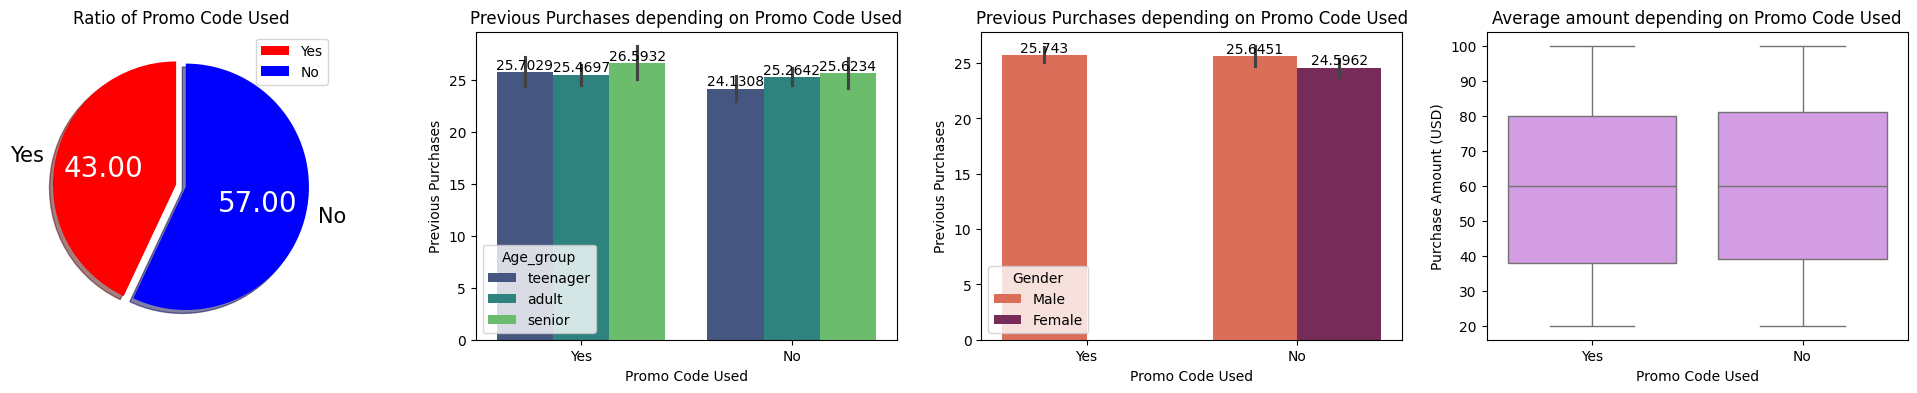

In [ ]:
plt.figure(figsize=(25,4))

plt.subplot(1,4,1)
d=[(trend['Promo Code Used']=='Yes').sum(),(trend['Promo Code Used']=='No').sum()]
widget,text,sliceText=plt.pie(d,explode=[0.04,0.04],labels=['Yes','No'],shadow=True,colors=['red','blue'],startangle=90,autopct='%.2f')
for s in sliceText:
   s.set_color('white')
   s.set_fontsize(20)
for s1 in text:
   s1.set_color('black')
   s1.set_fontsize(15)
plt.legend()
plt.title('Ratio of Promo Code Used')

plt.subplot(1,4,2)
obj=sns.barplot(data=trend,x='Promo Code Used',y='Previous Purchases',palette='viridis',hue='Age_group')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Previous Purchases depending on Promo Code Used')

plt.subplot(1,4,3)
obj=sns.barplot(data=trend,x='Promo Code Used',y='Previous Purchases',palette='rocket_r',hue='Gender')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Previous Purchases depending on Promo Code Used')

plt.subplot(1,4,4)
obj=sns.boxplot(data=trend,x='Promo Code Used',y='Purchase Amount (USD)',color='#D891EF')
# for i in obj.containers:
#   obj.bar_label(i)
plt.title('Average amount depending on Promo Code Used')


observation:
* Most customers are not using any promo code
* Using or not using any promo code does not make any big change in sales profit and purchases

#Shipping Type

###Most preferred shipping type

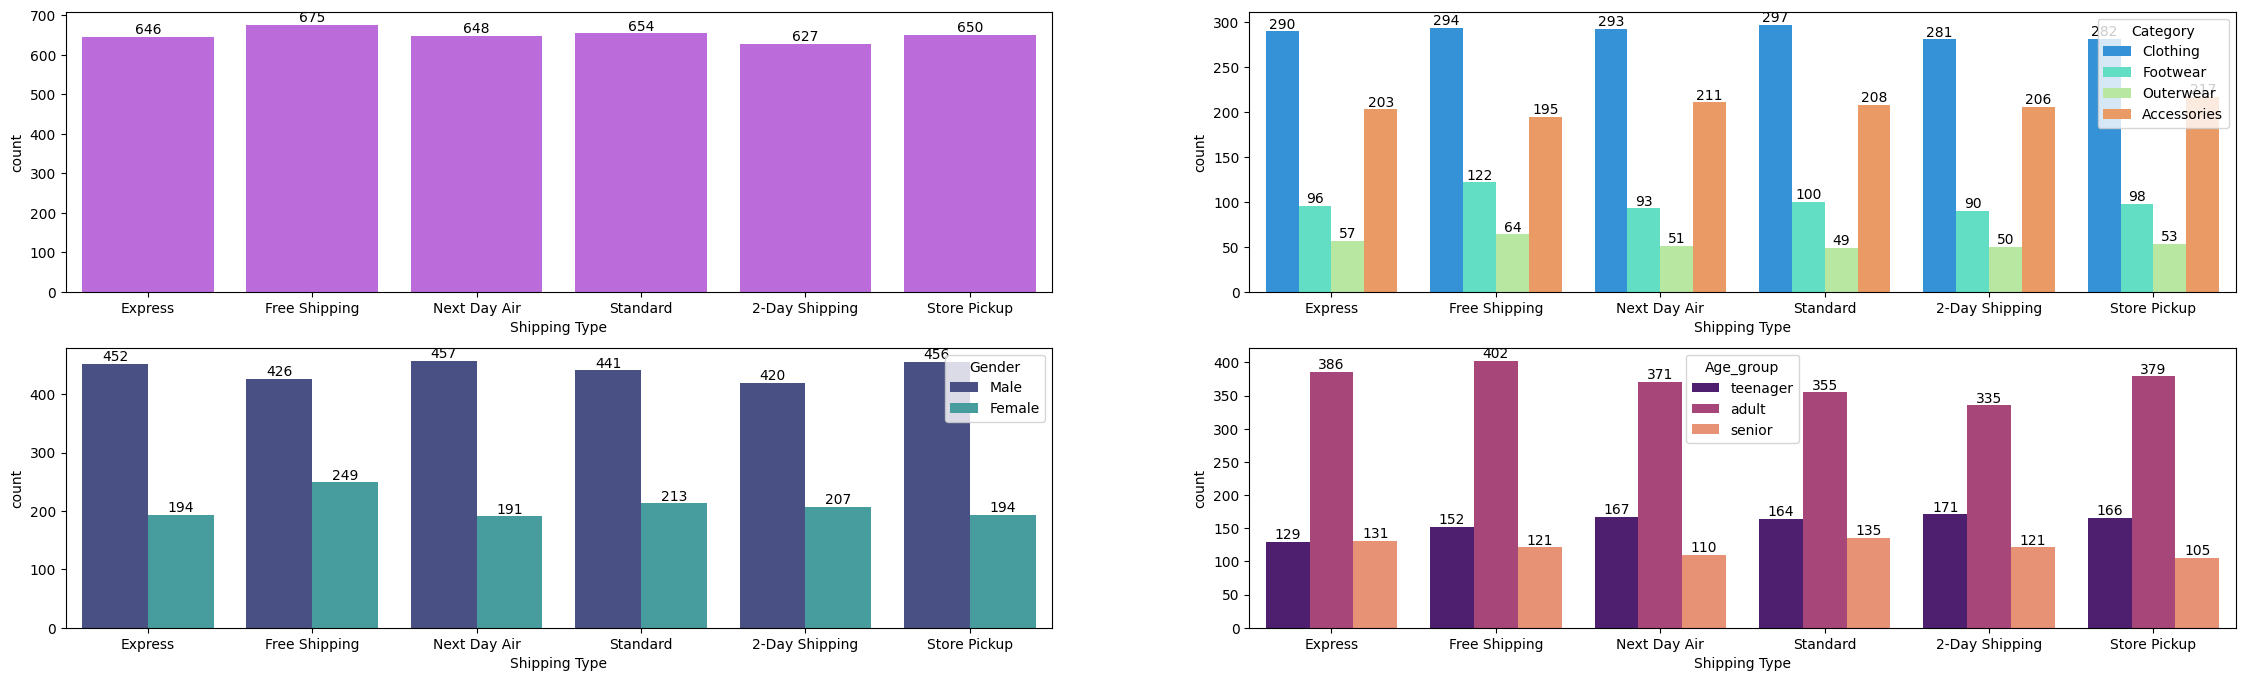

In [ ]:
plt.figure(figsize=(28,8))

plt.subplot(2,2,1)
obj=sns.countplot(data=trend,x='Shipping Type',color='#C45AEC')
for i in obj.containers:
  obj.bar_label(i)


plt.subplot(2,2,2)
obj=sns.countplot(data=trend,x='Shipping Type',hue='Category',palette='rainbow')
for i in obj.containers:
  obj.bar_label(i)

plt.subplot(2,2,3)
obj=sns.countplot(data=trend,x='Shipping Type',hue='Gender',palette='mako')
for i in obj.containers:
  obj.bar_label(i)

plt.subplot(2,2,4)
obj=sns.countplot(data=trend,x='Shipping Type',hue='Age_group',palette='magma')
for i in obj.containers:
  obj.bar_label(i)

observation:
* The most preferred shipping type in general, is Free shipping and least preffered is 2-day shipping
* The least preferred is 2 day shipping

###Amount spend on shipping types

Text(0.5, 1.0, 'Average amount spend on each Shipping Type')

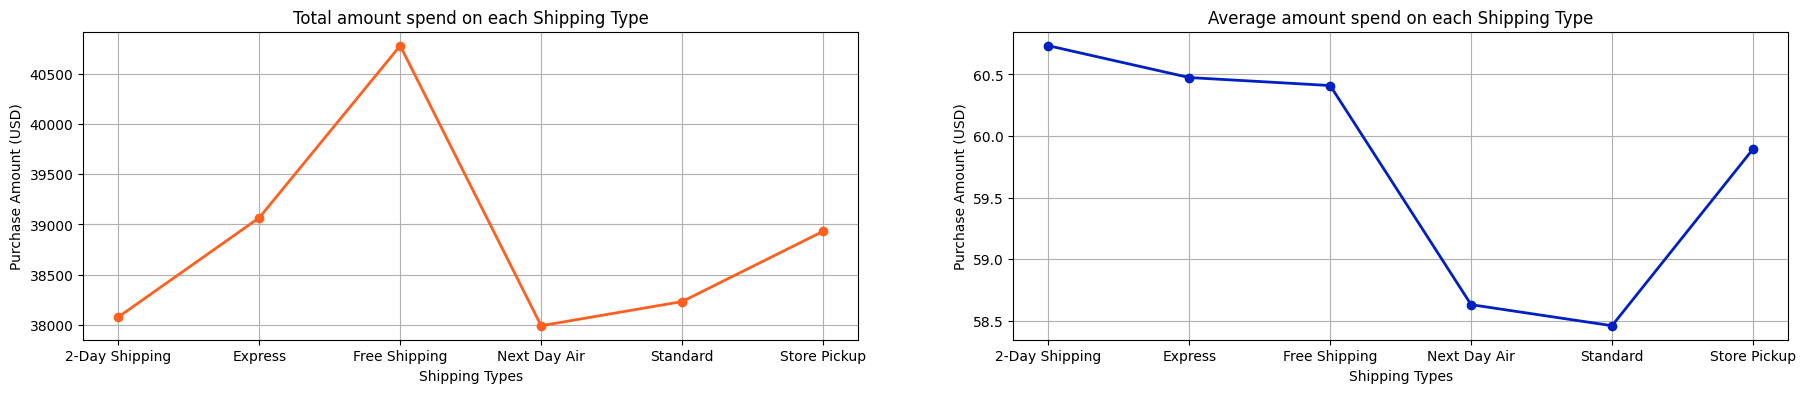

In [ ]:
plt.figure(figsize=(22,4))

plt.subplot(1,2,1)
data=pd.pivot_table(data=trend,index='Shipping Type',values='Purchase Amount (USD)',aggfunc='sum').reset_index()
x=data['Shipping Type']
y=data['Purchase Amount (USD)']
plt.plot(x,y,color='#FF5F1F',marker='o',linewidth=2)
plt.grid()
plt.xlabel('Shipping Types')
plt.ylabel("Purchase Amount (USD)")
plt.title("Total amount spend on each Shipping Type")


plt.subplot(1,2,2)
data1=pd.pivot_table(data=trend,index='Shipping Type',values='Purchase Amount (USD)',aggfunc='mean').reset_index()
x=data1['Shipping Type']
y=data1['Purchase Amount (USD)']
plt.plot(x,y,color='#0020C2',marker='o',linewidth=2)
plt.grid()
plt.xlabel('Shipping Types')
plt.ylabel("Purchase Amount (USD)")
plt.title("Average amount spend on each Shipping Type")


 observation:
 * The total amount spend was higher for free shipping but the average amount is higher for 2 day shipping
 * Express, free and store pickup are the better choices

#Payment Options

Text(0.5, 1.0, 'Ratio of Preferred Payment Method')

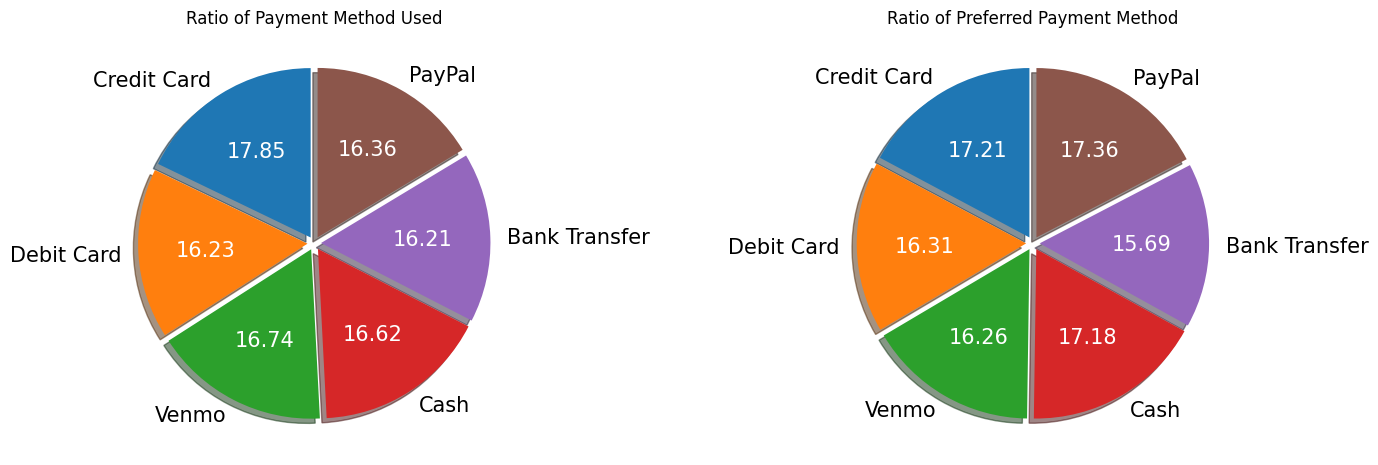

In [ ]:
plt.figure(figsize=(17,5.5))

plt.subplot(1,2,1)
d=[(trend['Payment Method']=='Credit Card').sum(),(trend['Payment Method']=='Debit Card').sum(),(trend['Payment Method']=='Venmo').sum(),(trend['Payment Method']=='Cash').sum(),(trend['Payment Method']=='Bank Transfer').sum(),(trend['Payment Method']=='PayPal').sum()]
widget,text,sliceText=plt.pie(d,explode=[0.04,0.04,0.04,0.04,0.04,0.04],labels=['Credit Card','Debit Card','Venmo','Cash','Bank Transfer','PayPal'],shadow=True,startangle=90,autopct='%.2f')
for s in sliceText:
   s.set_color('white')
   s.set_fontsize(15)
for s1 in text:
   s1.set_color('black')
   s1.set_fontsize(15)
plt.title('Ratio of Payment Method Used')

plt.subplot(1,2,2)
d=[(trend['Preferred Payment Method']=='Credit Card').sum(),(trend['Preferred Payment Method']=='Debit Card').sum(),(trend['Preferred Payment Method']=='Venmo').sum(),(trend['Preferred Payment Method']=='Cash').sum(),(trend['Preferred Payment Method']=='Bank Transfer').sum(),(trend['Preferred Payment Method']=='PayPal').sum()]
widget,text,sliceText=plt.pie(d,explode=[0.04,0.04,0.04,0.04,0.04,0.04],labels=['Credit Card','Debit Card','Venmo','Cash','Bank Transfer','PayPal'],shadow=True,startangle=90,autopct='%.2f')
for s in sliceText:
   s.set_color('white')
   s.set_fontsize(15)
for s1 in text:
   s1.set_color('black')
   s1.set_fontsize(15)
plt.title('Ratio of Preferred Payment Method')

#CONCLUSION
1) Following Trends

* Focusing on high-performing categories and based on locations and seasons.

*	Giving more preferences to most bought categories and prefer advertising them

2) Customer Analysis

* Using items based on the age group, gender and preferences of the customer

* Boosting up the product quality to the customer based on customer’s frequent purchases.

3) Product Details

* Using more products based on different sizes or colors preferred

* Adding more quantity of products based on sales in different locations according to preferences

4) Payment and Shipping Preferences

* Providing offers related to preferred payment methods and shipping types

* Offering more free shipping or express shipping for orders for most used payment types, depending on the amount

5) Advertising

* Showing frequently the most preferred item with respect to the categories, colors and additional factors to attract customers in advertisements

* Adding discount offers and promo codes to the least moving items and varying the prices wrt subscriptions
